## Voting Classifier

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

### Loading CSV File

In [3]:
data=pd.read_csv('KS.csv')


### Let's Know the shape of our Dataset

In [4]:
data.shape

(316, 7)

### Let's Know our Columns

In [5]:
data.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

### Let's seperate data

In [6]:
features = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']
target=['target']

In [7]:
x=data[features]
y=data[target]

### Let's Split and Train Data

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

In [9]:
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



clf2 = XGBClassifier(random_state=42)
clf3 = GaussianNB()
clf4 = SVC(probability=True, random_state=42)

VC = VotingClassifier(estimators=[('XGB', clf2), ('GNB', clf3), ('svm', clf4)],
                        voting='soft', weights=[1,1,1])

VC.fit(x_train, y_train)

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_d

In [10]:
y_prediction=VC.predict(x_test)

### Accuracy Score

In [11]:
Accuracy_Score= accuracy_score(y_test,y_prediction)
print('The Accuracy Score is :',Accuracy_Score)

The Accuracy Score is : 0.9052631578947369


### Confusion matrix

In [12]:
confusion_matrix(y_test,y_prediction)

array([[54,  0],
       [ 9, 32]], dtype=int64)

### Plot Confusion Matrix

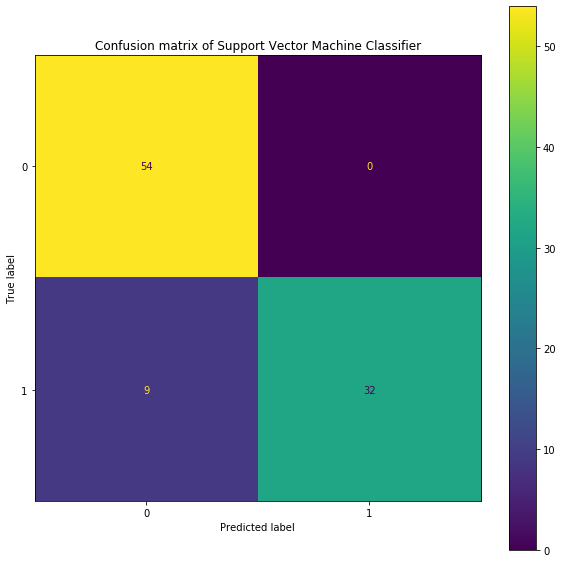

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(VC, x_test, y_test, ax=ax)
plt.title('Confusion matrix of Support Vector Machine Classifier')
plt.show()

### Classification Report

In [14]:
classification_Report= classification_report(y_test,y_prediction)
print(classification_Report)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        54
           1       1.00      0.78      0.88        41

    accuracy                           0.91        95
   macro avg       0.93      0.89      0.90        95
weighted avg       0.92      0.91      0.90        95

